In [737]:
# Install the required libraries
!pip install prophet

In [738]:
# import dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet
import matplotlib.pyplot as plt

In [739]:
#read in unemployment csv as dataframe
#set index to 'date' column
# set 'date' to datetime
df= pd.read_csv('resources/Unemployment Rates 1978 - 2023.csv',
               parse_dates= True,
               index_col= 'date')
df.head()

,all,16-24,25-54,55-64,65+,less_than_hs,high_school,some_college,bachelor's_degree,advanced_degree,...,white_men_16-24,white_men_25-54,white_men_55-64,white_men_65+,white_men_less_than_hs,white_men_high_school,white_men_some_college,white_men_bachelor's_degree,white_men_advanced_degree,population_over_16
date,,,,,,,,,,,,,,,,,,,,,
2023-07-01,3.6,7.8,3.1,2.4,2.7,7.0,4.8,3.4,2.4,1.7,...,7.0,2.5,2.1,2.4,7.0,3.8,2.8,2.1,1.6,267002000
2023-06-01,3.6,7.8,3.1,2.4,2.8,7.1,4.8,3.4,2.4,1.7,...,7.0,2.5,2.1,2.5,7.0,3.8,2.9,2.1,1.6,266801000
2023-05-01,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,1.7,...,7.0,2.5,2.1,2.5,6.9,3.8,2.9,2.1,1.6,266618000
2023-04-01,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,1.7,...,7.0,2.5,2.2,2.5,6.9,3.8,2.9,2.1,1.6,266443000
2023-03-01,3.6,8.0,3.0,2.5,2.8,7.1,4.8,3.5,2.4,1.7,...,7.1,2.5,2.2,2.5,6.8,3.9,2.9,2.1,1.7,266272000


In [740]:
# look at all the columns
df.columns.values

array(['all', '16-24', '25-54', '55-64', '65+', 'less_than_hs',
       'high_school', 'some_college', "bachelor's_degree",
       'advanced_degree', 'women', 'women_16-24', 'women_25-54',
       'women_55-64', 'women_65+', 'women_less_than_hs',
       'women_high_school', 'women_some_college',
       "women_bachelor's_degree", 'women_advanced_degree', 'men',
       'men_16-24', 'men_25-54', 'men_55-64', 'men_65+',
       'men_less_than_hs', 'men_high_school', 'men_some_college',
       "men_bachelor's_degree", 'men_advanced_degree', 'black',
       'black_16-24', 'black_25-54', 'black_55-64', 'black_65+',
       'black_less_than_hs', 'black_high_school', 'black_some_college',
       "black_bachelor's_degree", 'black_advanced_degree', 'black_women',
       'black_women_16-24', 'black_women_25-54', 'black_women_55-64',
       'black_women_65+', 'black_women_less_than_hs',
       'black_women_high_school', 'black_women_some_college',
       "black_women_bachelor's_degree", 'black_women_ad

In [741]:
# keep only the columns we need
unemployment_df = df[[ 'all']]
display(unemployment_df.head(30))
display(unemployment_df.tail(30))

,all
date,
2023-07-01,3.6
2023-06-01,3.6
2023-05-01,3.6
2023-04-01,3.6
2023-03-01,3.6
2023-02-01,3.6
2023-01-01,3.6
2022-12-01,3.6
2022-11-01,3.7


,all
date,
1981-05-01,7.6
1981-04-01,7.6
1981-03-01,7.6
1981-02-01,7.5
1981-01-01,7.4
1980-12-01,7.3
1980-11-01,7.2
1980-10-01,7.0
1980-09-01,6.9


In [742]:
# use .info to learn more about the dataframe
# drop nulls if any 
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 536 entries, 2023-07-01 to 1978-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   all     536 non-null    float64
dtypes: float64(1)
memory usage: 8.4 KB


In [743]:
# sort index 
unemployment_df = unemployment_df.sort_index()
unemployment_df.head(10)

,all
date,
1978-12-01,6.1
1979-01-01,6.1
1979-02-01,6.0
1979-03-01,6.0
1979-04-01,5.9
1979-05-01,5.9
1979-06-01,5.9
1979-07-01,5.8
1979-08-01,5.8


<Axes: xlabel='date'>

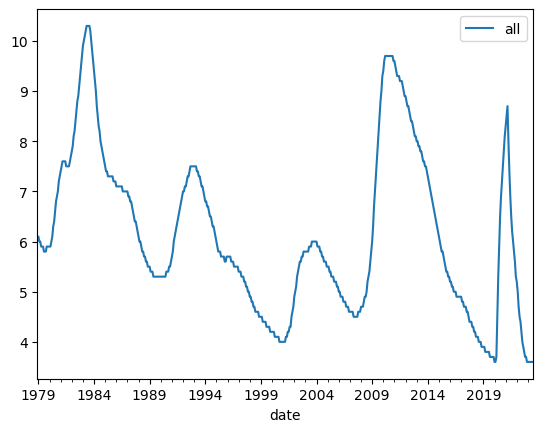

In [744]:
unemployment_df.plot()

In [745]:
# create a new column to shift the umployment rate by 1 month
unemployment_df['Unemployment Rate Shifted'] = unemployment_df['all'].shift(-1)
unemployment_df.head()

,all,Unemployment Rate Shifted
date,,
1978-12-01,6.1,6.1
1979-01-01,6.1,6.0
1979-02-01,6.0,6.0
1979-03-01,6.0,5.9
1979-04-01,5.9,5.9


In [746]:
# drop the 'all' column
unemployment_df = unemployment_df.drop(columns='all')
unemployment_df.head()

,Unemployment Rate Shifted
date,
1978-12-01,6.1
1979-01-01,6.0
1979-02-01,6.0
1979-03-01,5.9
1979-04-01,5.9


In [747]:
# Reset the index so that we recode the columns for Prophet
unemployment_df = unemployment_df.reset_index()

In [748]:
# Label the columns ds and y so that the syntax is recognized by Prophet
unemployment_df = unemployment_df.rename(columns= {'date': 'ds', 'Unemployment Rate Shifted': 'y'})

In [749]:
# View dataframe shape, and the first and last five rows of the mercado_prophet_df DataFrame
display(unemployment_df.shape)
display(unemployment_df.head())
display(unemployment_df.tail())

(536, 2)

,ds,y
0,1978-12-01,6.1
1,1979-01-01,6.0
2,1979-02-01,6.0
3,1979-03-01,5.9
4,1979-04-01,5.9


,ds,y
531,2023-03-01,3.6
532,2023-04-01,3.6
533,2023-05-01,3.6
534,2023-06-01,3.6
535,2023-07-01,NaN


In [750]:
# Sort the DataFrame by `ds` in ascending order
unemployment_df = unemployment_df.sort_values(by=["ds"], ascending=True)

# Display sample data from head and tail
display(unemployment_df.head(10))
display(unemployment_df.tail(10))

,ds,y
0,1978-12-01,6.1
1,1979-01-01,6.0
2,1979-02-01,6.0
3,1979-03-01,5.9
4,1979-04-01,5.9
5,1979-05-01,5.9
6,1979-06-01,5.8
7,1979-07-01,5.8
8,1979-08-01,5.8
9,1979-09-01,5.9


,ds,y
526,2022-10-01,3.7
527,2022-11-01,3.6
528,2022-12-01,3.6
529,2023-01-01,3.6
530,2023-02-01,3.6
531,2023-03-01,3.6
532,2023-04-01,3.6
533,2023-05-01,3.6
534,2023-06-01,3.6
535,2023-07-01,NaN


In [751]:
# create a new column to calculate 100 minus the unemployment rate
unemployment_df['Employment Rate'] = 100 - unemployment_df['y']
unemployment_df.head()


,ds,y,Employment Rate
0,1978-12-01,6.1,93.9
1,1979-01-01,6.0,94.0
2,1979-02-01,6.0,94.0
3,1979-03-01,5.9,94.1
4,1979-04-01,5.9,94.1


In [752]:
# remove column y
unemployment_df = unemployment_df.drop(columns='y')
unemployment_df.head()

,ds,Employment Rate
0,1978-12-01,93.9
1,1979-01-01,94.0
2,1979-02-01,94.0
3,1979-03-01,94.1
4,1979-04-01,94.1


In [753]:
# rename Employment Rate to y
unemployment_df = unemployment_df.rename(columns= {'Employment Rate': 'y'})
unemployment_df.head()

,ds,y
0,1978-12-01,93.9
1,1979-01-01,94.0
2,1979-02-01,94.0
3,1979-03-01,94.1
4,1979-04-01,94.1


In [754]:
#911 DATA

In [755]:
# reduce the dataset to only the period from December 1978 to October 2001
unemployment_df_911_forecast = unemployment_df.loc[(unemployment_df["ds"] >= "1978-12") & (unemployment_df["ds"] <= "2001-08")]
display(unemployment_df_911_forecast.head(10))
display(unemployment_df_911_forecast.tail(10))

,ds,y
0,1978-12-01,93.9
1,1979-01-01,94.0
2,1979-02-01,94.0
3,1979-03-01,94.1
4,1979-04-01,94.1
5,1979-05-01,94.1
6,1979-06-01,94.2
7,1979-07-01,94.2
8,1979-08-01,94.2
9,1979-09-01,94.1


,ds,y
263,2000-11-01,96.0
264,2000-12-01,96.0
265,2001-01-01,96.0
266,2001-02-01,96.0
267,2001-03-01,95.9
268,2001-04-01,95.9
269,2001-05-01,95.8
270,2001-06-01,95.8
271,2001-07-01,95.7
272,2001-08-01,95.7


<Axes: xlabel='ds'>

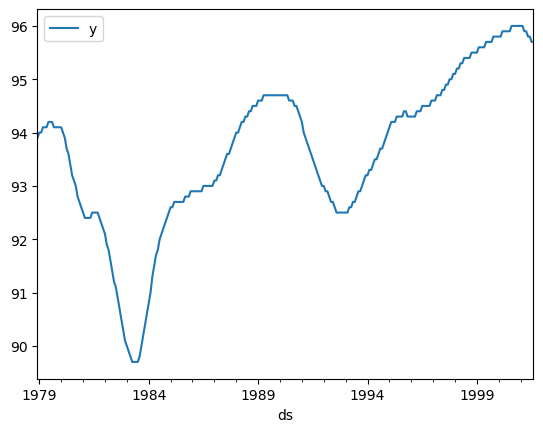

In [756]:
# plot the data
unemployment_df_911_forecast.plot(x = 'ds', y = 'y')

In [757]:
# Call the Prophet function, store as an object
model_911_unemployment = Prophet()
model_911_unemployment

In [758]:
# Fit the Prophet model.
model_911_unemployment.fit(unemployment_df_911_forecast)

21:53:32 - cmdstanpy - INFO - Chain [1] start processing


21:53:32 - cmdstanpy - INFO - Chain [1] done processing


In [759]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 3 years
future_911_unemployment = model_911_unemployment.make_future_dataframe(periods=36, freq='M')

# View the last five rows of the predictions
future_911_unemployment.tail()

/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
304,2004-03-31
305,2004-04-30
306,2004-05-31
307,2004-06-30
308,2004-07-31


In [760]:
# Make the predictions for the trend data using the future_trends DataFrame
future_911_unemployment = model_911_unemployment.predict(future_911_unemployment)

# Display the first five rows of the forecast DataFrame
future_911_unemployment.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1978-12-01,93.950880,93.822332,94.063483,93.950880,93.950880,-0.005738,-0.005738,-0.005738,-0.005738,-0.005738,-0.005738,0.0,0.0,0.0,93.945142
1,1979-01-01,93.988169,93.884179,94.127889,93.988169,93.988169,0.018264,0.018264,0.018264,0.018264,0.018264,0.018264,0.0,0.0,0.0,94.006433
2,1979-02-01,94.025457,93.915350,94.151791,94.025457,94.025457,0.008740,0.008740,0.008740,0.008740,0.008740,0.008740,0.0,0.0,0.0,94.034197
3,1979-03-01,94.059137,93.941444,94.164956,94.059137,94.059137,-0.004223,-0.004223,-0.004223,-0.004223,-0.004223,-0.004223,0.0,0.0,0.0,94.054914
4,1979-04-01,94.096426,93.970955,94.226591,94.096426,94.096426,0.003644,0.003644,0.003644,0.003644,0.003644,0.003644,0.0,0.0,0.0,94.100070


/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


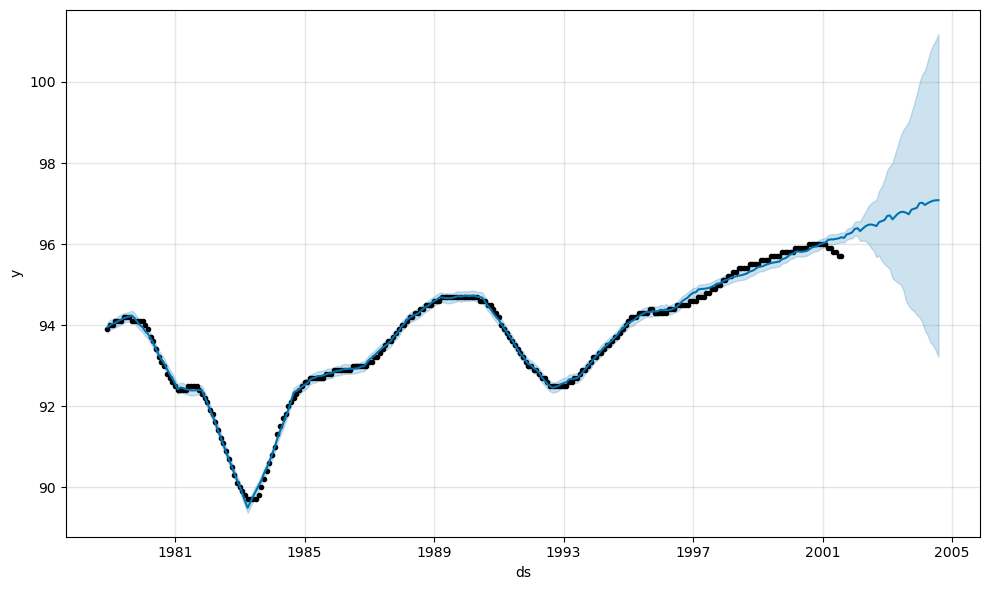

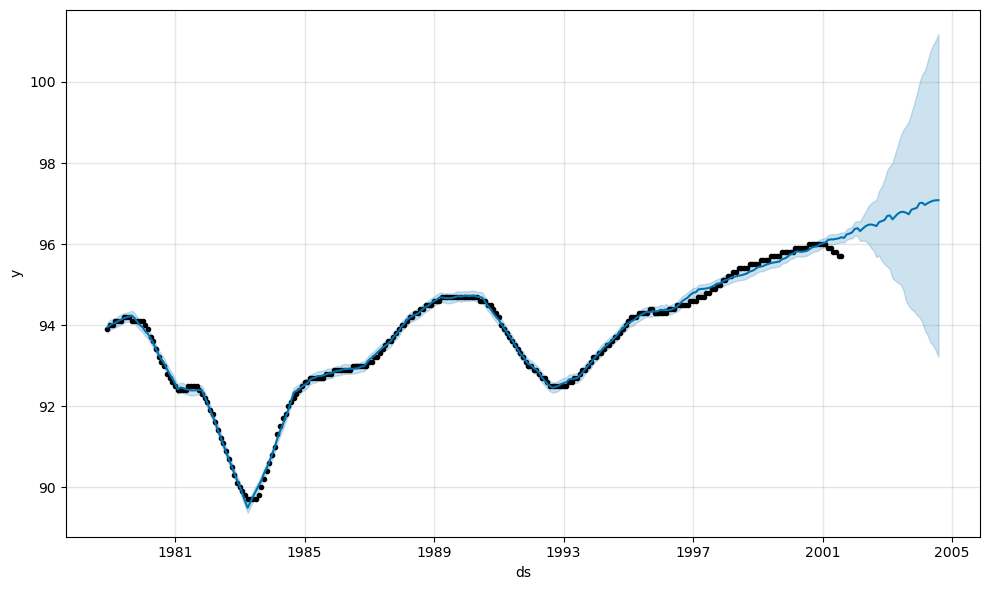

In [761]:
# Plot the Prophet predictions for the Mercado trends data
model_911_unemployment.plot(future_911_unemployment)

/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

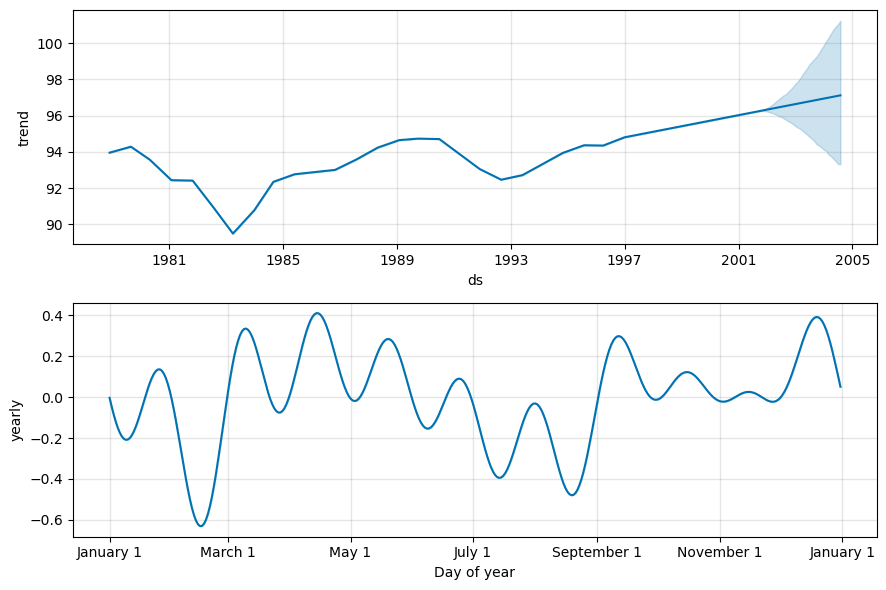

In [762]:
# Use the plot_components function to visualize the forecast results 
figures_911_unemployment = model_911_unemployment.plot_components(future_911_unemployment)

In [763]:
# At this point, it's useful to set the `datetime` index of the forecast data.
future_911_unemployment = future_911_unemployment.set_index(["ds"])
future_911_unemployment.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
1978-12-01,93.950880,93.822332,94.063483,93.950880,93.950880,-0.005738,-0.005738,-0.005738,-0.005738,-0.005738,-0.005738,0.0,0.0,0.0,93.945142
1979-01-01,93.988169,93.884179,94.127889,93.988169,93.988169,0.018264,0.018264,0.018264,0.018264,0.018264,0.018264,0.0,0.0,0.0,94.006433
1979-02-01,94.025457,93.915350,94.151791,94.025457,94.025457,0.008740,0.008740,0.008740,0.008740,0.008740,0.008740,0.0,0.0,0.0,94.034197
1979-03-01,94.059137,93.941444,94.164956,94.059137,94.059137,-0.004223,-0.004223,-0.004223,-0.004223,-0.004223,-0.004223,0.0,0.0,0.0,94.054914
1979-04-01,94.096426,93.970955,94.226591,94.096426,94.096426,0.003644,0.003644,0.003644,0.003644,0.003644,0.003644,0.0,0.0,0.0,94.100070


In [764]:
# reduce the dataset to only the period from December 1978 to July 2004
unemployment_df_911_actual = unemployment_df.loc[(unemployment_df["ds"] >= "1978-12") & (unemployment_df["ds"] <= "2004-07")]
display(unemployment_df_911_actual.head(10))
display(unemployment_df_911_actual.tail(10))

,ds,y
0,1978-12-01,93.9
1,1979-01-01,94.0
2,1979-02-01,94.0
3,1979-03-01,94.1
4,1979-04-01,94.1
5,1979-05-01,94.1
6,1979-06-01,94.2
7,1979-07-01,94.2
8,1979-08-01,94.2
9,1979-09-01,94.1


,ds,y
298,2003-10-01,94.0
299,2003-11-01,94.0
300,2003-12-01,94.0
301,2004-01-01,94.1
302,2004-02-01,94.1
303,2004-03-01,94.1
304,2004-04-01,94.2
305,2004-05-01,94.2
306,2004-06-01,94.3
307,2004-07-01,94.3


<Axes: xlabel='ds'>

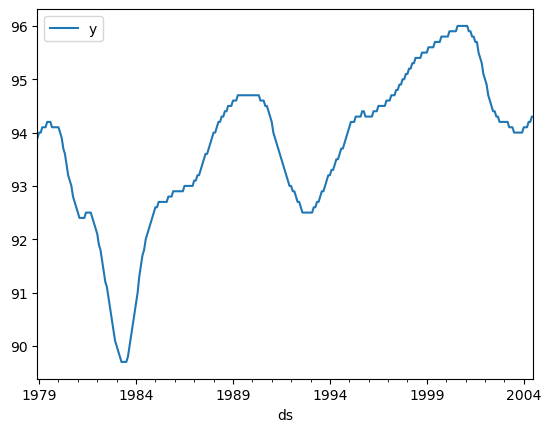

In [765]:
# Plot the data
unemployment_df_911_actual.plot(x = 'ds', y = 'y')

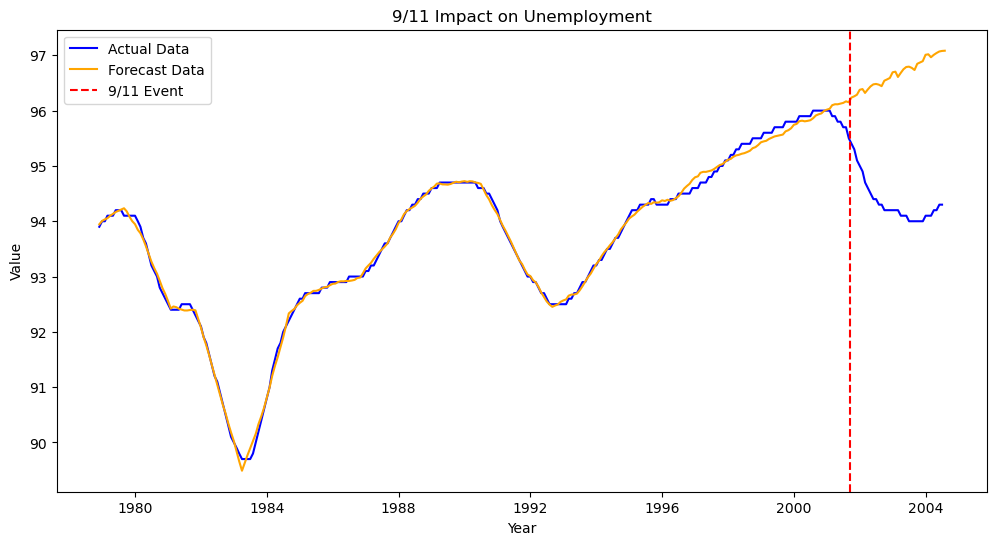

In [766]:
# Assuming 'actual_data' and 'forecast_data' are your DataFrames
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(unemployment_df_911_actual['ds'],unemployment_df_911_actual['y'], label='Actual Data', color='blue')

# Plot forecast data
plt.plot(future_911_unemployment.index,future_911_unemployment['yhat'], label='Forecast Data', color='orange')

# Mark the 9/11 event
event_date = pd.to_datetime('2001-09-11')
plt.axvline(x=event_date, color='red', linestyle='--', label='9/11 Event')

# Add titles and labels
plt.title('9/11 Impact on Unemployment')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

In [767]:
#Katrina DATA

In [768]:
# Unemployment Rate

In [769]:
# reduce the dataset to only the period from September 1995 to August 2005
unemployment_df_katrina_forecast = unemployment_df.loc[(unemployment_df["ds"] >= "1995-09") & (unemployment_df["ds"] <= "2005-08")]
display(unemployment_df_katrina_forecast.head(10))
display(unemployment_df_katrina_forecast.tail(10))

,ds,y
201,1995-09-01,94.4
202,1995-10-01,94.4
203,1995-11-01,94.3
204,1995-12-01,94.3
205,1996-01-01,94.3
206,1996-02-01,94.3
207,1996-03-01,94.3
208,1996-04-01,94.4
209,1996-05-01,94.4
210,1996-06-01,94.4


,ds,y
311,2004-11-01,94.5
312,2004-12-01,94.5
313,2005-01-01,94.5
314,2005-02-01,94.6
315,2005-03-01,94.6
316,2005-04-01,94.7
317,2005-05-01,94.7
318,2005-06-01,94.7
319,2005-07-01,94.8
320,2005-08-01,94.8


<Axes: xlabel='ds'>

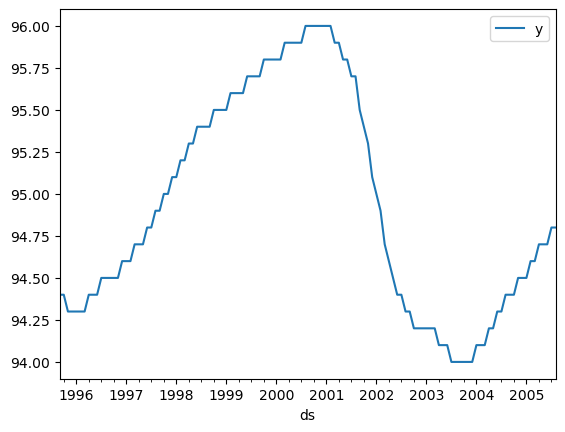

In [770]:
# plot the data
unemployment_df_katrina_forecast.plot(x = 'ds', y = 'y')

In [771]:
# Call the Prophet function, store as an object
model_katrina_unemployment = Prophet()
model_katrina_unemployment

In [772]:
# Fit the Prophet model.
model_katrina_unemployment.fit(unemployment_df_katrina_forecast)

21:53:33 - cmdstanpy - INFO - Chain [1] start processing
21:53:33 - cmdstanpy - INFO - Chain [1] done processing


In [773]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 3 years
future_katrina_unemployment = model_katrina_unemployment.make_future_dataframe(periods=36, freq='M')
# View the last five rows of the predictions
future_katrina_unemployment.tail()

/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
151,2008-03-31
152,2008-04-30
153,2008-05-31
154,2008-06-30
155,2008-07-31


In [774]:
# Make the predictions for the trend data using the future_trends DataFrame
future_katrina_unemployment = model_katrina_unemployment.predict(future_katrina_unemployment)
# Display the first five rows of the forecast DataFrame
future_katrina_unemployment.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1995-09-01,94.387296,94.349179,94.425113,94.387296,94.387296,0.001961,0.001961,0.001961,0.001961,0.001961,0.001961,0.0,0.0,0.0,94.389257
1,1995-10-01,94.363316,94.353916,94.429145,94.363316,94.363316,0.027433,0.027433,0.027433,0.027433,0.027433,0.027433,0.0,0.0,0.0,94.390749
2,1995-11-01,94.338536,94.293533,94.368455,94.338536,94.338536,-0.009072,-0.009072,-0.009072,-0.009072,-0.009072,-0.009072,0.0,0.0,0.0,94.329464
3,1995-12-01,94.314555,94.255973,94.329041,94.314555,94.314555,-0.019948,-0.019948,-0.019948,-0.019948,-0.019948,-0.019948,0.0,0.0,0.0,94.294607
4,1996-01-01,94.289776,94.251034,94.328707,94.289776,94.289776,-0.000826,-0.000826,-0.000826,-0.000826,-0.000826,-0.000826,0.0,0.0,0.0,94.288950


/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


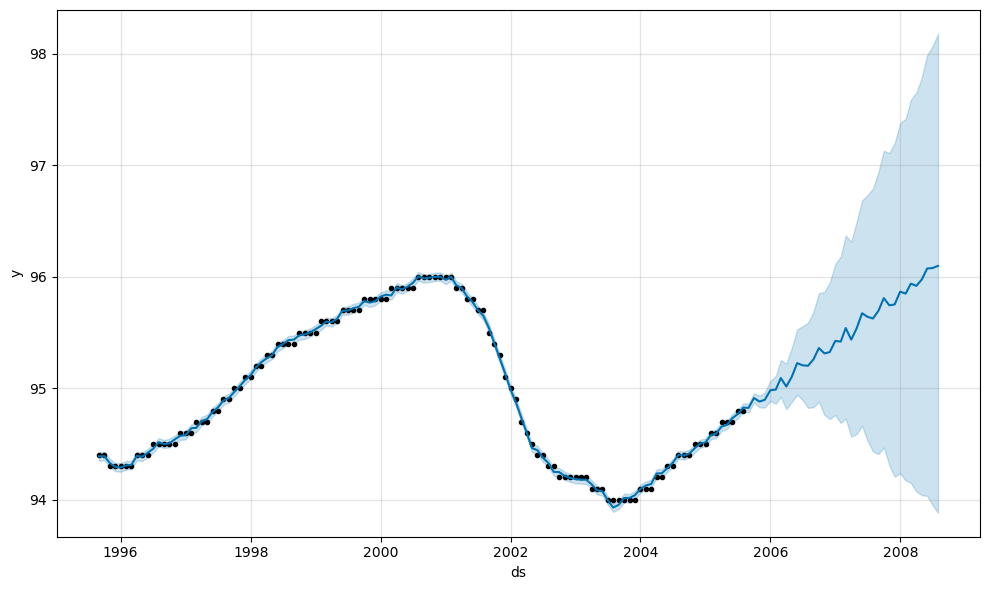

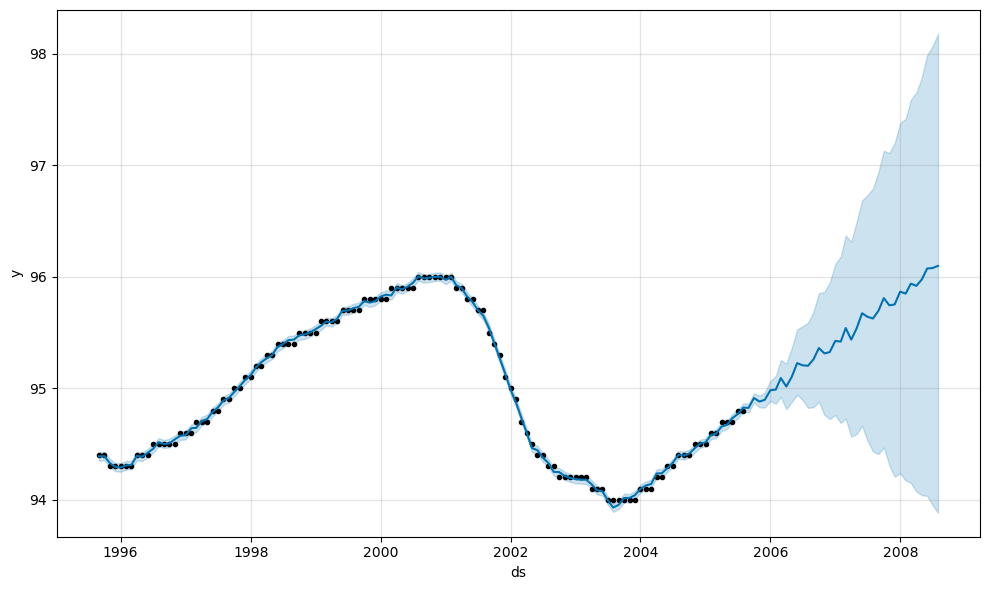

In [775]:
# Plot the Prophet predictions for the Mercado trends data
model_katrina_unemployment.plot(future_katrina_unemployment)

/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

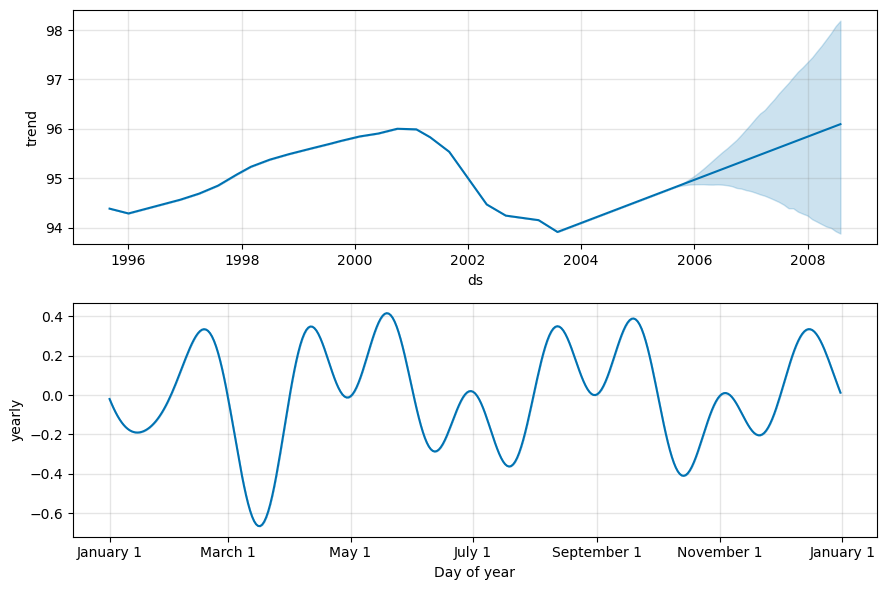

In [776]:
# Use the plot_components function to visualize the forecast results 
figures_katrina_unemployment = model_katrina_unemployment.plot_components(future_katrina_unemployment)

In [777]:
# At this point, it's useful to set the `datetime` index of the forecast data.
future_katrina_unemployment = future_katrina_unemployment.set_index(["ds"])
future_katrina_unemployment.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
1995-09-01,94.387296,94.349179,94.425113,94.387296,94.387296,0.001961,0.001961,0.001961,0.001961,0.001961,0.001961,0.0,0.0,0.0,94.389257
1995-10-01,94.363316,94.353916,94.429145,94.363316,94.363316,0.027433,0.027433,0.027433,0.027433,0.027433,0.027433,0.0,0.0,0.0,94.390749
1995-11-01,94.338536,94.293533,94.368455,94.338536,94.338536,-0.009072,-0.009072,-0.009072,-0.009072,-0.009072,-0.009072,0.0,0.0,0.0,94.329464
1995-12-01,94.314555,94.255973,94.329041,94.314555,94.314555,-0.019948,-0.019948,-0.019948,-0.019948,-0.019948,-0.019948,0.0,0.0,0.0,94.294607
1996-01-01,94.289776,94.251034,94.328707,94.289776,94.289776,-0.000826,-0.000826,-0.000826,-0.000826,-0.000826,-0.000826,0.0,0.0,0.0,94.288950


In [778]:
# reduce the dataset to only the period from August 1995 to July 2008
unemployment_df_katrina_actual = unemployment_df.loc[(unemployment_df["ds"] >= "1995-08") & (unemployment_df["ds"] <= "2008-07")]
display(unemployment_df_katrina_actual.head(10))
display(unemployment_df_katrina_actual.tail(10))

,ds,y
200,1995-08-01,94.3
201,1995-09-01,94.4
202,1995-10-01,94.4
203,1995-11-01,94.3
204,1995-12-01,94.3
205,1996-01-01,94.3
206,1996-02-01,94.3
207,1996-03-01,94.3
208,1996-04-01,94.4
209,1996-05-01,94.4


,ds,y
346,2007-10-01,95.4
347,2007-11-01,95.4
348,2007-12-01,95.3
349,2008-01-01,95.3
350,2008-02-01,95.3
351,2008-03-01,95.2
352,2008-04-01,95.1
353,2008-05-01,95.1
354,2008-06-01,95.0
355,2008-07-01,94.8


<Axes: xlabel='ds'>

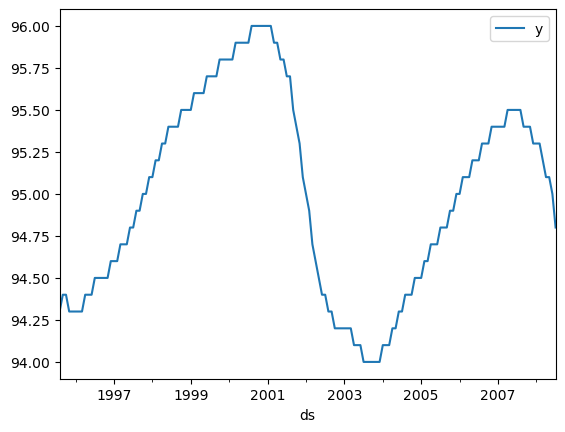

In [779]:
# Plot the data
unemployment_df_katrina_actual.plot(x = 'ds', y = 'y')

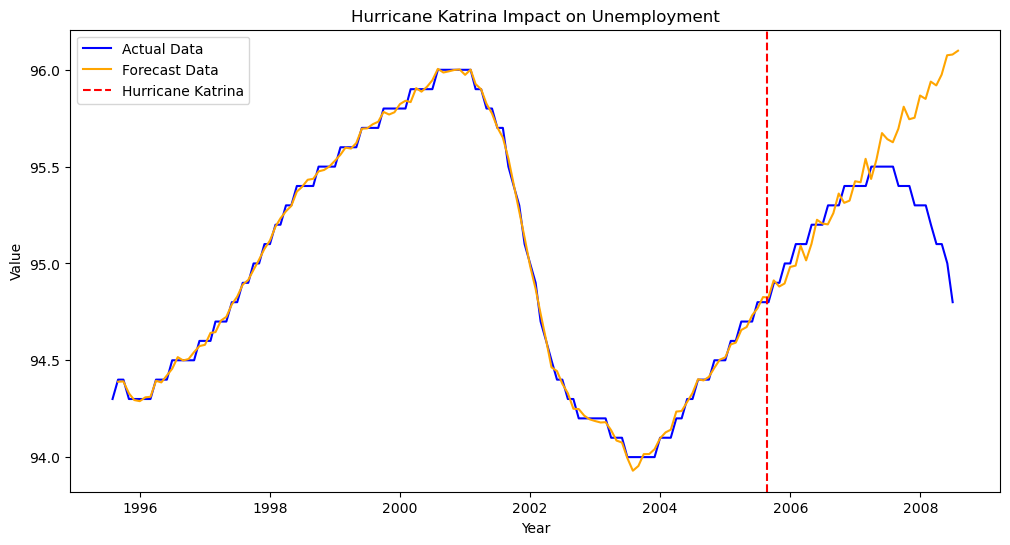

In [780]:
# Assuming 'actual_data' and 'forecast_data' are your DataFrames
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(unemployment_df_katrina_actual['ds'],unemployment_df_katrina_actual['y'], label='Actual Data', color='blue')

# Plot forecast data
plt.plot(future_katrina_unemployment.index,future_katrina_unemployment['yhat'], label='Forecast Data', color='orange')

# Mark the Katrina event
event_date = pd.to_datetime('2005-08-23')
plt.axvline(x=event_date, color='red', linestyle='--', label='Hurricane Katrina')

# Add titles and labels
plt.title('Hurricane Katrina Impact on Unemployment')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()